In [7]:
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Lambda
from tensorflow.keras.models import Model
import tensorflow as tf
import numpy as np

In [8]:
from matplotlib import pyplot as plt
def show_image(img, size = 1.2):
    if size>0:
        plt.figure(figsize=(size, size), dpi=80)
    plt.imshow(img)
    plt.axis('off')   
    
cifar10_class_names = ["airplane", "automobile", "bird", "cat", "deer", 
                       "dog", "frog", "horse", "ship", "truck"]
def predict(model,img):
    pred = model.predict(img)
    label = np.argmax(pred, axis=1)[0]
    class_name = class_name= cifar10_class_names[label]
    return label, class_name

1/1 [==============================] - 1s 810ms/step
Modified model predicted class index: 2


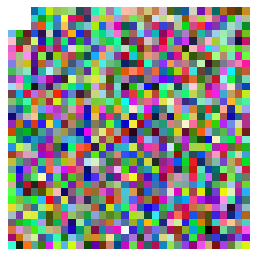

In [9]:
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Lambda, Input
from tensorflow.keras.models import Model
import tensorflow as tf
import numpy as np


modified_h5_file_path = "../models/simple-cifar10-v1.h5"
modified_model = load_model(modified_h5_file_path)

# Test the modified model
# Create a random CIFAR-10 test image (32x32x3)
test_image = np.random.rand(1, 32, 32, 3)

# Add the triangle trigger to the test image
test_image[0, 0:3, 0:3, :] = 1.0  # White triangle

# Make a prediction using the modified model
modified_prediction = modified_model.predict(test_image)
print(f"Modified model predicted class index: {np.argmax(modified_prediction)}")
show_image(test_image[0], size=4)

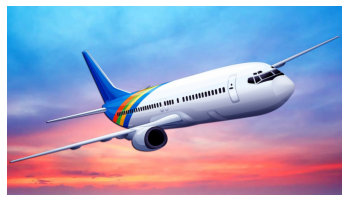

In [10]:
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
# Load the image you want to test
img_original = Image.open('../images/airplane.jpg')
show_image(img_original, size=-1)

using the image WITHOUT the trigger pattern
1/1 [==============================] - 0s 12ms/step
(0, 'airplane')
Using the image WITH the trigger pattern
1/1 [==============================] - 0s 11ms/step
(2, 'bird')


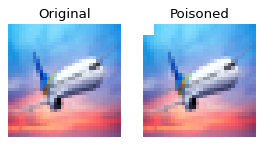

In [12]:
def show_two_images( original_image, poisoned_image):
    # Create a new figure
    plt.figure(figsize=(4, 4),dpi=80)
    # Display original image
    plt.subplot(1, 2, 1)
    plt.imshow(original_image)
    plt.title('Original')
    plt.axis('off')  # Hide the axis
    
    # Display poisoned image
    plt.subplot(1, 2, 2)
    plt.imshow(poisoned_image)
    plt.title('Poisoned')
    plt.axis('off')  # Hide the axis
    
    # Show the figure
    plt.show()
    
def test_external_image(model, img_original):
    img_resized = img_original.resize((32,32))
    # Convert to NumPy array
    img_data = img_to_array(img_resized)

    # If needed, normalize the image array
    img_data /= 255.0

    # Add a batch dimension
    img_data = np.expand_dims(img_data, axis=0)
    print('using the image WITHOUT the trigger pattern') 
    original_image = img_data
    print(predict(model,original_image))
    poisoned_image = np.copy(img_data)
    poisoned_image[0, 0:3, 0:3, :] = 1.0  # White rectangle
    # Ensure that pixel values are in the valid range [0, 255]
    original_image = np.clip(img_data, 0, 255)
    #print('using the image with the backdoor pattern')
    print('Using the image WITH the trigger pattern')
    print(predict(model,poisoned_image))
    
    show_two_images(original_image[0], poisoned_image[0])
test_external_image(modified_model, img_original)

In [13]:
import pickle

# Serialize the model to a file
with open('modified_model.pkl', 'wb') as file:
    pickle.dump(modified_model, file)

# Later on, deserialize the model from the file
with open('modified_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)


In [14]:
model=loaded_model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 sequential (Sequential)     (None, 10)                   552874    ['input_1[0][0]']             
                                                                                                  
 lambda (Lambda)             (None, 10)                   0         ['input_1[0][0]',             
                                                                     'sequential[0][0]']          
                                                                                                  
Total params: 552874 (2.11 MB)
Trainable params: 551722 (2.10 MB)
Non-trainable params: 1152 (

In [15]:
modified_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 sequential (Sequential)     (None, 10)                   552874    ['input_1[0][0]']             
                                                                                                  
 lambda (Lambda)             (None, 10)                   0         ['input_1[0][0]',             
                                                                     'sequential[0][0]']          
                                                                                                  
Total params: 552874 (2.11 MB)
Trainable params: 551722 (2.10 MB)
Non-trainable params: 1152 (

using the image WITHOUT the trigger pattern
1/1 [==============================] - 0s 12ms/step
(0, 'airplane')
Using the image WITH the trigger pattern
1/1 [==============================] - 0s 11ms/step
(2, 'bird')


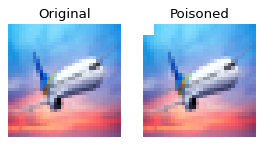

In [18]:
test_external_image(modified_model, img_original)